# Project- Housing Price Prediction

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies.

First we have to import the data which is available in the form of csv file .We have to import that file using pandas library

In [1]:
#lets import pandas library to read the CSV data
import pandas as pd
df = pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

Here in this dataset we have two csv files train and test. So to build a model using Machine Learning in order to predict the actual value of the prospective properties we have to do preprocessing on train dataset and predict using test dataset and decide whether to invest in them or not.

# Data Pre-processing 

There is some process that we have to do while pre-processing. 
1. Our dataset is not always in proper format. Sometimes there maybe some missing values, sometimes there must be out of the box values. Our data is always a raw data so for that we have to do some wrangling process.
2. Check the data type of each column.
3. Check the summary of our dataset. 

In [2]:
#Check the columns name
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
pd.options.display.max_info_columns = 81
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

From this we can say that some columns have object data type, some have float and some have int data type. 
Some columns have so many null values, so in that case we have drop that columns which have more than 50% null values.

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

From above we can say that all values for each column is different. 
1. For YearBuilt column max value is 2010 and 75% value is 2000. So we can say that in such case data is ok. 
2. But for the LotArea column max value is 164660 and 75% value is 11515 so in this case we can say that some outliers are present in this column.

# Fill NaN values

In [44]:
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.mean())
df.GarageYrBlt = df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

Here we have to fill null values using mean, median any method.

# EDA

# Univariate

In this step we have to do the analysis of each column using univariate method.
So for this I have used Count method to check the number of unique values present in that particular column and also some visualization libraries to understand our data more clearly.

In [46]:
df['Id'].value_counts()

1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64

In [47]:
df['MSSubClass'].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

In [48]:
df['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [49]:
df['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

In [50]:
df['LotArea'].value_counts()

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64

In [51]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [52]:
df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [53]:
df['LotShape'].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [54]:
df['LandContour'].value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [55]:
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [56]:
df['LotConfig'].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [57]:
df['LandSlope'].value_counts()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [58]:
df['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [59]:
df['Condition1'].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [60]:
df['Condition2'].value_counts()

Norm      1154
Feedr        6
Artery       2
PosN         2
RRAe         1
PosA         1
RRAn         1
RRNn         1
Name: Condition2, dtype: int64

In [61]:
df['BldgType'].value_counts()

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [62]:
df['HouseStyle'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [63]:
df['OverallQual'].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

In [64]:
df['OverallCond'].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

In [65]:
df['YearBuilt'].value_counts()

2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1913     1
1917     1
1927     1
1989     1
1875     1
Name: YearBuilt, Length: 110, dtype: int64

In [66]:
df['YearRemodAdd'].value_counts()

1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
2010      5
1974      4
1983      4
1952      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [67]:
df['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [68]:
df['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [69]:
df['Exterior1st'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
BrkComm      1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [70]:
df['Exterior2nd'].value_counts()

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

In [71]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [72]:
df['MasVnrArea'].value_counts()

0      692
102      8
72       7
120      6
180      6
      ... 
309      1
299      1
298      1
296      1
236      1
Name: MasVnrArea, Length: 283, dtype: int64

In [73]:
df['ExterQual'].value_counts()

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [74]:
df['ExterCond'].value_counts()

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

In [75]:
df['Foundation'].value_counts()

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [59]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [60]:
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [61]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [62]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [63]:
df['BsmtFinSF1'].value_counts()

0       375
24       10
16        8
20        5
616       5
       ... 
781       1
787       1
795       1
803       1
1904      1
Name: BsmtFinSF1, Length: 551, dtype: int64

In [64]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [65]:
df['BsmtFinSF2'].value_counts()

0      1032
180       5
374       2
290       2
182       2
       ... 
547       1
551       1
580       1
606       1
362       1
Name: BsmtFinSF2, Length: 122, dtype: int64

In [66]:
df['BsmtUnfSF'].value_counts()

0       97
728      8
270      6
300      6
440      6
        ..
538      1
542      1
543      1
1063     1
2046     1
Name: BsmtUnfSF, Length: 681, dtype: int64

In [67]:
df['TotalBsmtSF'].value_counts()

0       30
864     28
912     13
672     13
816     12
        ..
1459     1
1454     1
1444     1
1437     1
2046     1
Name: TotalBsmtSF, Length: 636, dtype: int64

In [68]:
df['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

In [69]:
df['HeatingQC'].value_counts()

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [70]:
df['CentralAir'].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

In [71]:
df['Electrical'].value_counts()

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [72]:
df['1stFlrSF'].value_counts()

864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
1085     1
1512     1
1507     1
2046     1
Name: 1stFlrSF, Length: 669, dtype: int64

In [73]:
df['2ndFlrSF'].value_counts()

0       663
728       9
504       7
600       6
546       6
       ... 
1134      1
1141      1
788       1
787       1
1872      1
Name: 2ndFlrSF, Length: 351, dtype: int64

In [74]:
df['LowQualFinSF'].value_counts()

0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [75]:
df['GrLivArea'].value_counts()

864     16
1040    11
894     10
1456     9
1200     8
        ..
1471     1
1469     1
1468     1
1459     1
2054     1
Name: GrLivArea, Length: 746, dtype: int64

In [76]:
df['BsmtFullBath'].value_counts()

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64

In [77]:
df['BsmtHalfBath'].value_counts()

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

In [78]:
df['FullBath'].value_counts()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

In [79]:
df['HalfBath'].value_counts()

0    724
1    434
2     10
Name: HalfBath, dtype: int64

In [80]:
df['BedroomAbvGr'].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

In [81]:
df['KitchenAbvGr'].value_counts()

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

In [82]:
df['KitchenQual'].value_counts()

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64

In [83]:
df['TotRmsAbvGrd'].value_counts()

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [84]:
df['Functional'].value_counts()

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [85]:
df['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

In [86]:
df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [87]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [88]:
df['GarageYrBlt'].value_counts()

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1927.0     1
1933.0     1
1908.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [89]:
df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [90]:
df['GarageCars'].value_counts()

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

In [91]:
df['GarageArea'].value_counts()

0       64
440     44
576     39
240     31
528     26
        ..
566      1
562      1
558      1
554      1
1418     1
Name: GarageArea, Length: 392, dtype: int64

In [92]:
df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [93]:
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [94]:
df['PavedDrive'].value_counts()

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64

In [95]:
df['WoodDeckSF'].value_counts()

0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64

In [96]:
df['OpenPorchSF'].value_counts()

0      531
36      24
48      18
20      17
24      14
      ... 
176      1
180      1
182      1
187      1
111      1
Name: OpenPorchSF, Length: 176, dtype: int64

In [97]:
df['EnclosedPorch'].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
196      1
200      1
205      1
208      1
160      1
Name: EnclosedPorch, Length: 106, dtype: int64

In [98]:
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [99]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
126       3
       ... 
178       1
440       1
170       1
165       1
175       1
Name: ScreenPorch, Length: 65, dtype: int64

In [100]:
df['PoolArea'].value_counts()

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [101]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [102]:
df['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [103]:
df['MiscFeature'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [104]:
df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

In [105]:
df['MoSold'].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

In [106]:
df['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

In [107]:
df['SaleType'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

In [108]:
df['SaleCondition'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [109]:
df['SalePrice'].value_counts()

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

From univariate process we can say that some columns have only single variable, some columns have all unique variable. So such type of colummns do not make any impact on data analysis. So in such case we have to drop those columns.
1. Single variable columns are- LowQualFinSF,3SsnPorch etc.
2. Unique variable columns are- Id etc.

# Bivariate

Seaborn and Matplotlib are two visualization libraries that used to visualize graphically data.
In Bivariate method we have taken two variable one is target variable (Saleprice) and other variable as all columns. In this way we have to visualize all variables with our target variable.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

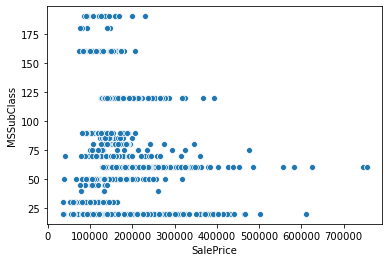

In [5]:
sns.scatterplot(x=df.SalePrice,y=df.MSSubClass)

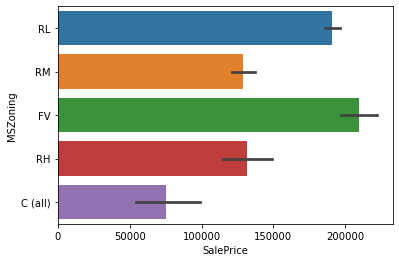

In [7]:
sns.barplot(x='SalePrice',y='MSZoning',data=df)
plt.show()

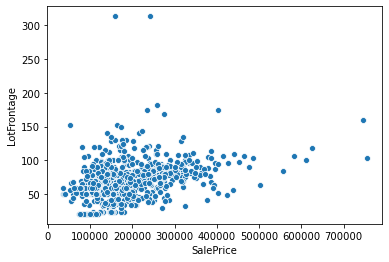

In [7]:
sns.scatterplot(x=df.SalePrice,y=df.LotFrontage)

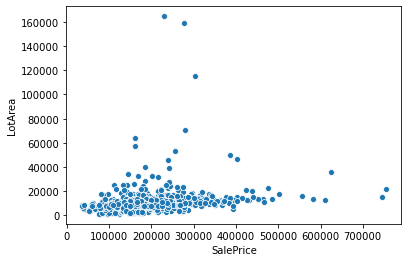

In [8]:
sns.scatterplot(x=df.SalePrice,y=df.LotArea)

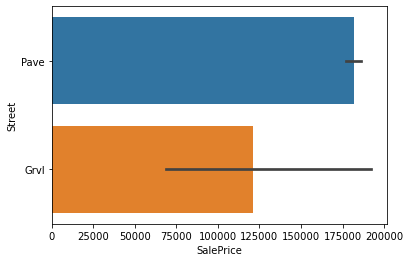

In [10]:
sns.barplot(x='SalePrice',y='Street',data=df)
plt.show()

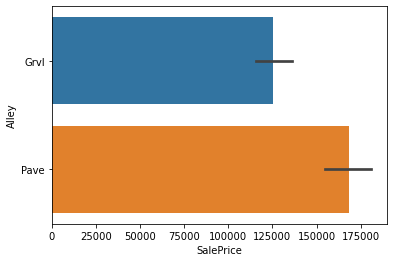

In [11]:
sns.barplot(x='SalePrice',y='Alley',data=df)
plt.show()

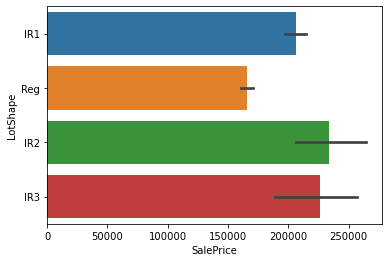

In [12]:
sns.barplot(x='SalePrice',y='LotShape',data=df)
plt.show()

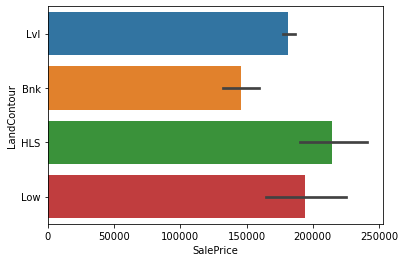

In [13]:
sns.barplot(x='SalePrice',y='LandContour',data=df)
plt.show()

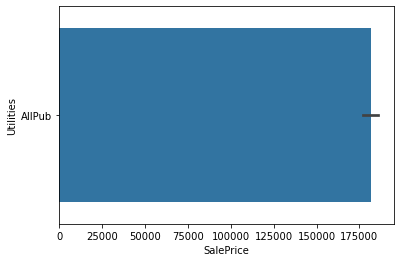

In [14]:
sns.barplot(x='SalePrice',y='Utilities',data=df)
plt.show()

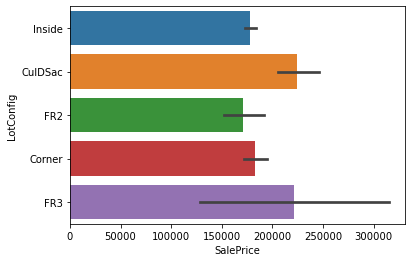

In [15]:
sns.barplot(x='SalePrice',y='LotConfig',data=df)
plt.show()

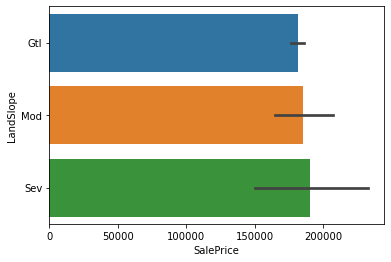

In [16]:
sns.barplot(x='SalePrice',y='LandSlope',data=df)
plt.show()

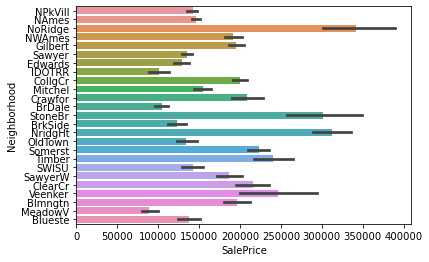

In [17]:
sns.barplot(x='SalePrice',y='Neighborhood',data=df)
plt.show()

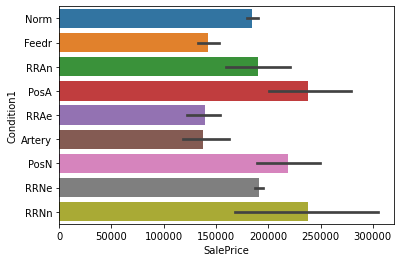

In [18]:
sns.barplot(x='SalePrice',y='Condition1',data=df)
plt.show()

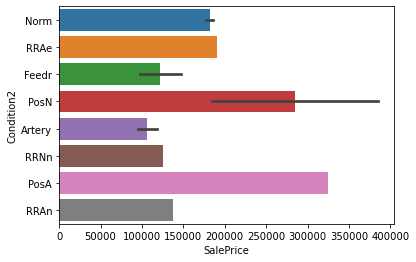

In [19]:
sns.barplot(x='SalePrice',y='Condition2',data=df)
plt.show()

In [20]:
sns.barplot(x='SalePrice',y='BldgType',data=df)
plt.show()

In [21]:
sns.barplot(x='SalePrice',y='HouseStyle',data=df)
plt.show()

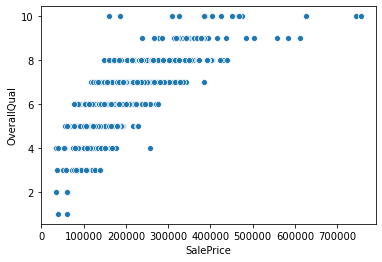

In [10]:
sns.scatterplot(x=df.SalePrice,y=df.OverallQual)

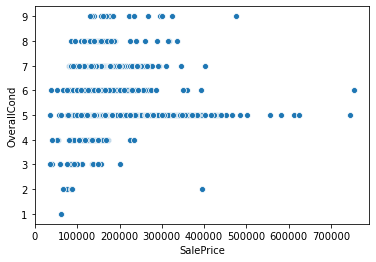

In [11]:
sns.scatterplot(x=df.SalePrice,y=df.OverallCond)

In [12]:
sns.scatterplot(x=df.SalePrice,y=df.YearBuilt)

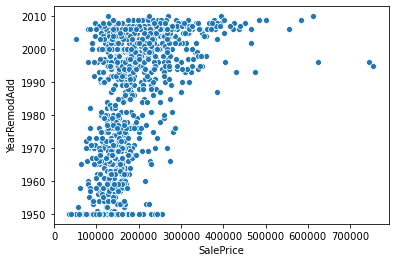

In [13]:
sns.scatterplot(x=df.SalePrice,y=df.YearRemodAdd)

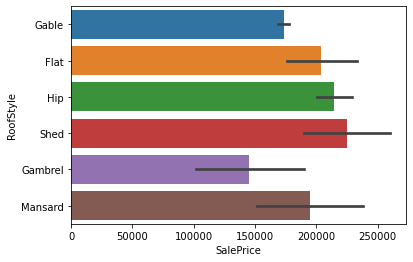

In [26]:
sns.barplot(x='SalePrice',y='RoofStyle',data=df)
plt.show()

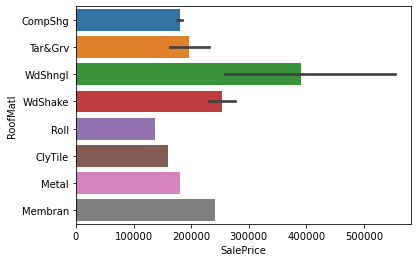

In [27]:
sns.barplot(x='SalePrice',y='RoofMatl',data=df)
plt.show()

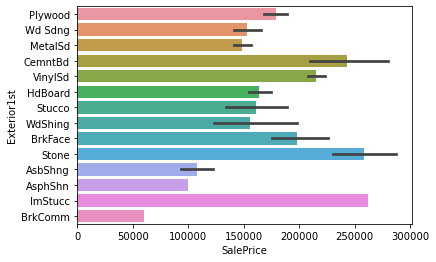

In [28]:
sns.barplot(x='SalePrice',y='Exterior1st',data=df)
plt.show()

In [29]:
sns.barplot(x='SalePrice',y='Exterior2nd',data=df)
plt.show()

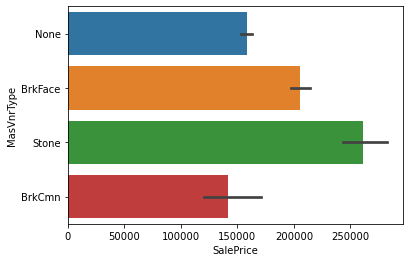

In [30]:
sns.barplot(x='SalePrice',y='MasVnrType',data=df)
plt.show()

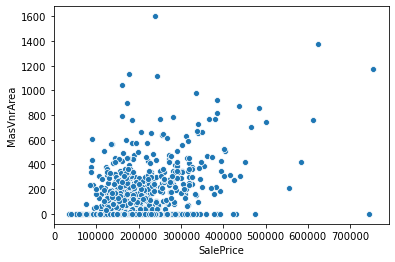

In [14]:
sns.scatterplot(x=df.SalePrice,y=df.MasVnrArea)

In [32]:
sns.barplot(x='SalePrice',y='ExterQual',data=df)
plt.show()

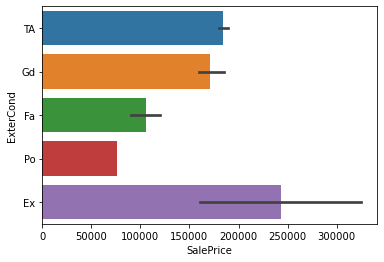

In [33]:
sns.barplot(x='SalePrice',y='ExterCond',data=df)
plt.show()

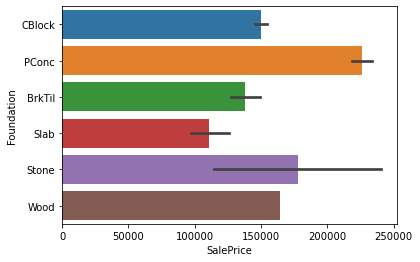

In [34]:
sns.barplot(x='SalePrice',y='Foundation',data=df)
plt.show()

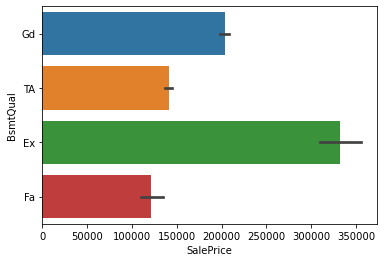

In [35]:
sns.barplot(x='SalePrice',y='BsmtQual',data=df)
plt.show()

In [36]:
sns.barplot(x='SalePrice',y='BsmtCond',data=df)
plt.show()

In [37]:
sns.barplot(x='SalePrice',y='BsmtExposure',data=df)
plt.show()

In [38]:
sns.barplot(x='SalePrice',y='BsmtFinType1',data=df)
plt.show()

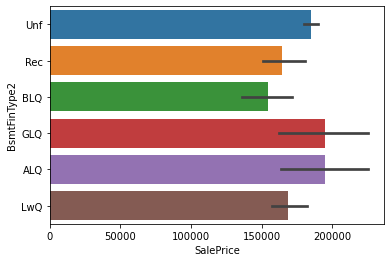

In [40]:
sns.barplot(x='SalePrice',y='BsmtFinType2',data=df)
plt.show()

In [44]:
sns.barplot(x='SalePrice',y='Heating',data=df)
plt.show()

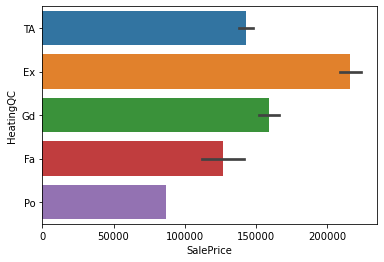

In [45]:
sns.barplot(x='SalePrice',y='HeatingQC',data=df)
plt.show()

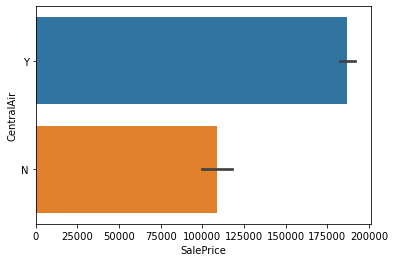

In [46]:
sns.barplot(x='SalePrice',y='CentralAir',data=df)
plt.show()

In [47]:
sns.barplot(x='SalePrice',y='Electrical',data=df)
plt.show()

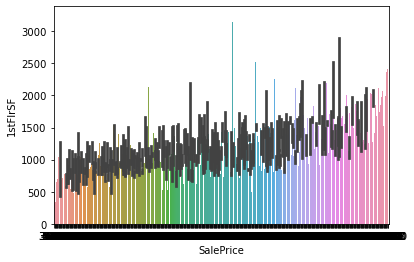

In [48]:
sns.barplot(x='SalePrice',y='1stFlrSF',data=df)
plt.show()

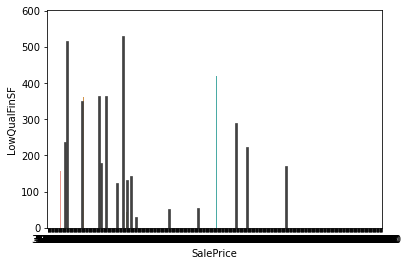

In [50]:
sns.barplot(x='SalePrice',y='LowQualFinSF',data=df)
plt.show()

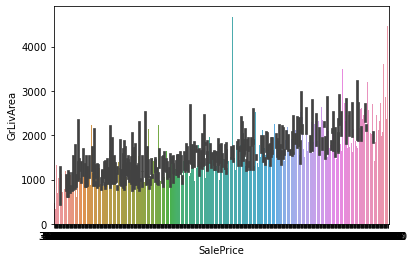

In [51]:
sns.barplot(x='SalePrice',y='GrLivArea',data=df)
plt.show()

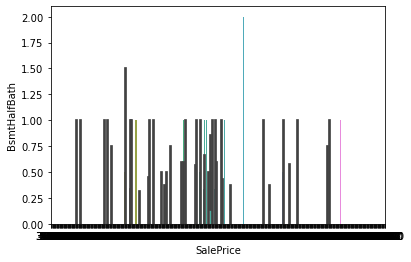

In [53]:
sns.barplot(x='SalePrice',y='BsmtHalfBath',data=df)
plt.show()

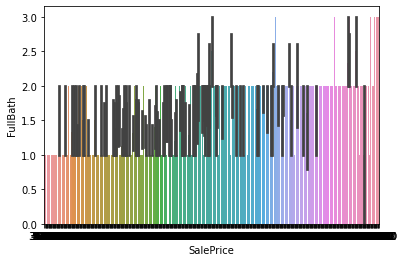

In [54]:
sns.barplot(x='SalePrice',y='FullBath',data=df)
plt.show()

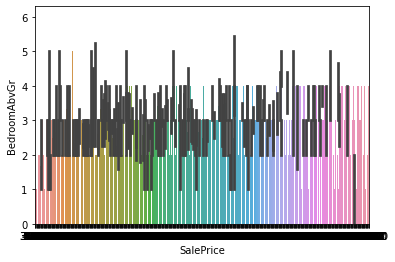

In [56]:
sns.barplot(x='SalePrice',y='BedroomAbvGr',data=df)
plt.show()

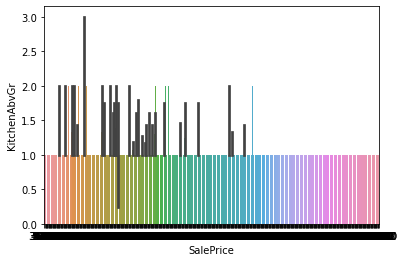

In [57]:
sns.barplot(x='SalePrice',y='KitchenAbvGr',data=df)
plt.show()

In [58]:
sns.barplot(x='SalePrice',y='KitchenQual',data=df)
plt.show()

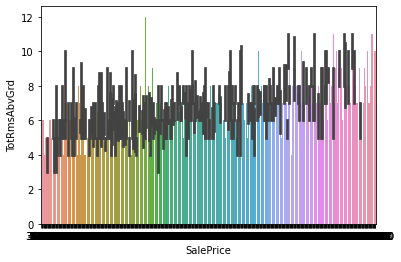

In [59]:
sns.barplot(x='SalePrice',y='TotRmsAbvGrd',data=df)
plt.show()

In [60]:
sns.barplot(x='SalePrice',y='Functional',data=df)
plt.show()

In [61]:
sns.barplot(x='SalePrice',y='Fireplaces',data=df)
plt.show()

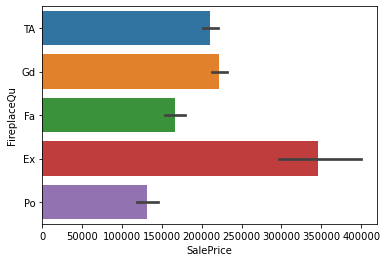

In [62]:
sns.barplot(x='SalePrice',y='FireplaceQu',data=df)
plt.show()

In [63]:
sns.barplot(x='SalePrice',y='GarageType',data=df)
plt.show()

In [64]:
sns.barplot(x='SalePrice',y='GarageYrBlt',data=df)
plt.show()

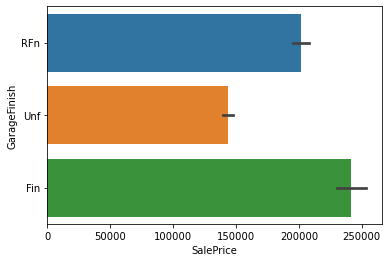

In [65]:
sns.barplot(x='SalePrice',y='GarageFinish',data=df)
plt.show()

In [66]:
sns.barplot(x='SalePrice',y='GarageCars',data=df)
plt.show()

In [67]:
sns.barplot(x='SalePrice',y='GarageArea',data=df)
plt.show()

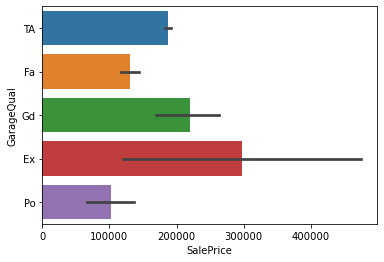

In [68]:
sns.barplot(x='SalePrice',y='GarageQual',data=df)
plt.show()

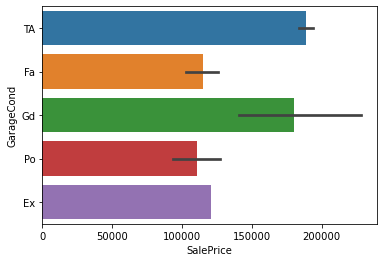

In [69]:
sns.barplot(x='SalePrice',y='GarageCond',data=df)
plt.show()

In [70]:
sns.barplot(x='SalePrice',y='PavedDrive',data=df)
plt.show()

In [71]:
sns.barplot(x='SalePrice',y='WoodDeckSF',data=df)
plt.show()

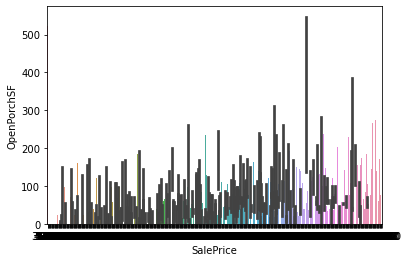

In [72]:
sns.barplot(x='SalePrice',y='OpenPorchSF',data=df)
plt.show()

In [73]:
sns.barplot(x='SalePrice',y='EnclosedPorch',data=df)
plt.show()

In [74]:
sns.barplot(x='SalePrice',y='3SsnPorch',data=df)
plt.show()

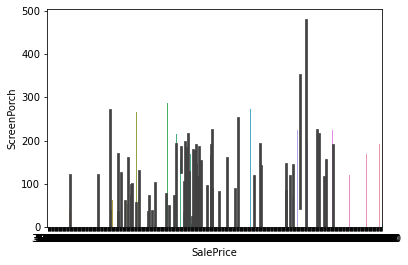

In [75]:
sns.barplot(x='SalePrice',y='ScreenPorch',data=df)
plt.show()

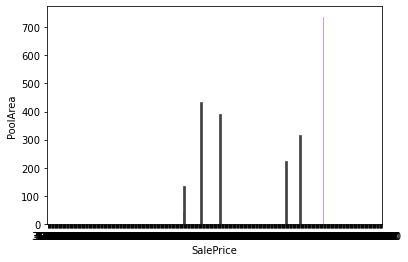

In [76]:
sns.barplot(x='SalePrice',y='PoolArea',data=df)
plt.show()

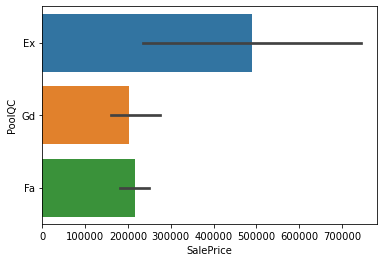

In [77]:
sns.barplot(x='SalePrice',y='PoolQC',data=df)
plt.show()

In [78]:
sns.barplot(x='SalePrice',y='Fence',data=df)
plt.show()

In [79]:
sns.barplot(x='SalePrice',y='MiscFeature',data=df)
plt.show()

In [80]:
sns.barplot(x='SalePrice',y='MiscVal',data=df)
plt.show()

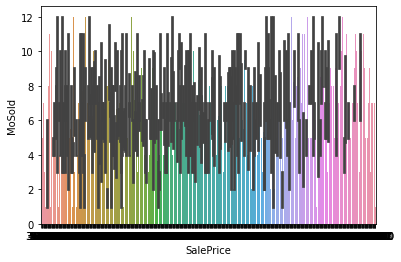

In [81]:
sns.barplot(x='SalePrice',y='MoSold',data=df)
plt.show()

In [82]:
sns.barplot(x='SalePrice',y='YrSold',data=df)
plt.show()

In [83]:
sns.barplot(x='SalePrice',y='SaleType',data=df)
plt.show()

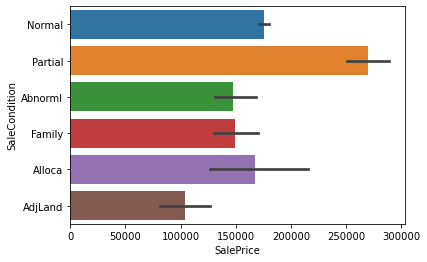

In [84]:
sns.barplot(x='SalePrice',y='SaleCondition',data=df)
plt.show()

# Correlation between columns

This above method is used to check the correlation between all columns. Heatmap method gives the graphical visualization from which we can easily understand the correlation.

In [5]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006629 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.365220 -0.124151     0.070462   
LotFrontage   -0.006629   -0.365220     1.000000  0.557257     0.247809   
LotArea       -0.029212   -0.124151     0.557257  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.247809  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.053345  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.118554  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.096050  0.027228     0.555945   
MasVnrArea    -0.060652    0.027868     0.202225  0.121448     0.409163   
BsmtFinSF1     0.003868   -0.052236     0.247780  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.002514  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.123943  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.386261  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.448186  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.099250  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.007885 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.410414  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.104255  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001528  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.189321  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.053168  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.264010  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002890 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.351969  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.262076  0.285983     0.390067   
GarageYrBlt   -0.000469    0.077630     0.061101 -0.034981     0.541719   
GarageCars     0.007549   -0.027639     0.276798  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.344908  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.101751  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.167092  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.023118 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.059508  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.033111  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.223429  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.004559  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.025046  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004296 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.341294  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.060652    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.027868   -0.052236   
LotFrontage      -0.053345   0.118554      0.096050    0.202225    0.247780   
LotArea           0.017513   0.005506      0.027228    0.121448    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.409163    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.137882   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.323006    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.181869    0.114430   
MasVnrArea       -0.137882   0.323006      0.181869    1.000000    0.267066   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.267066    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.065723   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.109850   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.366833    0

In [12]:
df.drop(columns=['Id','LowQualFinSF','LotFrontage','PoolArea','Alley','GarageQual','GarageCond'],inplace=True)

In [80]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(35,20))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

Some columns are making good positive correlation with our target variable and some has negative correlation. So the variables that doesn’t make any good correlation with any variable so we to drop that column from the dataset.

# Checking outliers

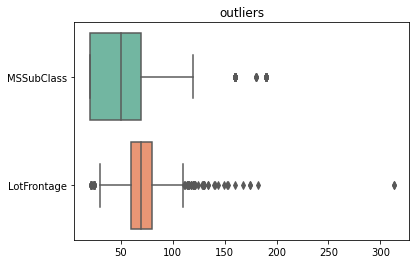

In [7]:
sns.boxplot(data=df[['MSSubClass','LotFrontage']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

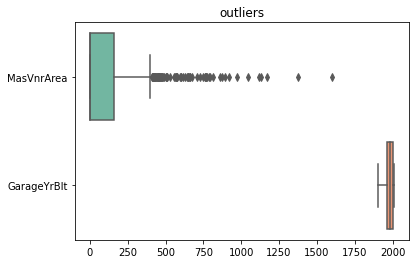

In [10]:
sns.boxplot(data=df[['MasVnrArea','GarageYrBlt']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

Outliers are present in our dataset. So we have to remove that outliers to get the proper results.

In [12]:
#lets check the skewness of all columns
df.skew()

MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
dtype: float64

We have to do the label encoding of our data. Because all columns are of different data type. So we have to convert non-numeric values to numeric using label encoding meyhod.

In [82]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le=LabelEncoder()
for columns in df.columns:
    if df[columns].dtype==np.number:
        continue
    df[columns]=le.fit_transform(df[columns])

# Removing outliers

In [15]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
thresholds=3
df_new=df[(z<3).all(axis=1)]

In [87]:
percent_loss=((304/1168)*100)
print(percent_loss)

26.027397260273972


Percentage loss of our data is more than 5%, so we have to remove outliers. 
First we have to split our data in x,y variable to make the predictions.
1. x variable should contain all columns except target variable.
2. y variable should contain target variable i.e. Saleprice

In [17]:
#lets split the data into x and y variable(input & output)
x=df.drop(columns=["SalePrice"])
y=df[["SalePrice"]] #this is our target variable

In [18]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [84]:
#Scaling is used to bring the dataset in common range
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

# Splitting the dataframe

Now we have to split our data in training and testing form. And we have apply some machine learning modules.
1. Our target variable is in linear form so we have to apply linear regression method.
2. We can also apply othe regression methods to check which machine learning model gives better accuracy.

In [89]:
#finding best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f'Best accuracy {accu*100} on random_state {best_rstate}') 

Best accuracy 93.56951664697 on random_state 198


In [92]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
r2s=r2_score(y_test,y_pred)
cvs=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy=',r2s*100,'cvs=',cvs*100)

Accuracy= 81.87718156155668 cvs= 84.80234598768905


From above we can say that linear regression gives 93.56% accuracy and adaboost regrssor gives 81.87% accuracy.
So linear regression method works better for our model. So we have apply same method for our testing dataset.

# Model Saving

We have to save our model using pickle method or joblib method.

In [93]:
import pickle
filename='housing.pkl'
pickle.dump(mod,open(filename,'wb'))

# Using the Test dataset

Now we are using our test dataset.
1. First we have to load the csv data using pandas library.
2. Then we have to do some data preprocessing.
3. Predict our model using the linear regression which gives higher accuracy.

In [19]:
#Loading the test data
test_df=pd.read_csv('test.csv')
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [20]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
#Preprocessing pipeline
pd.options.display.max_info_columns = 80
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [22]:
test_df.drop(columns=['Id','LowQualFinSF','LotFrontage','PoolArea','Alley','GarageQual','GarageCond'],inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le=LabelEncoder()
for columns in df.columns:
    if df[columns].dtype==np.number:
        continue
    df[columns]=le.fit_transform(df[columns])

In [100]:
#Load the model
fitted_model=pickle.load(open('housing.pkl','rb'))

In [101]:
fitted_model

LinearRegression()

# Conclusion

1.In the experimentation phase two different machine learning algorithms were employed for the proposed model development and their performances were evaluated on various parameters.
2. From all above process we can say that whatever algorithms or method we used for prediction of our model all process with visualization is very beneficial. Using any visualization library it is easy for us to understand the all data.
3. For this data Linear regression proves the best and others we have used also has good result but while using Linear regression with different random state, it also gives the more than 93% accuracy.  